# Project 2 - Ames Housing Data and Kaggle Challenge

## 01 EDA Cleaning and Feature Engineering

### Problem statement

Project2 - Ames Housing Data and Kaggle Challenge which use a data provided to create a regression model that predicts the price of houses in Ames.

##### The problem statement is  
In order to help the house owner decied features to do with their house:  
'If you want to sell your own house, which features could increase the values of your house and which features could drop the values of your house'

### Imports

In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from pandas.api.types import CategoricalDtype 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn import metrics
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OrdinalEncoder, OneHotEncoder

In [310]:
# import data

train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

In [311]:
train_ori = train.copy()
test_ori = test.copy()

In [312]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [313]:
train.shape

(2051, 81)

In [314]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [315]:
test.shape
# missing sale price

(879, 80)

In [316]:
# change columns to lowercase and remove spaces
train.columns = train.columns.str.lower()
train.columns = train.columns.str.replace(' ', '')

test.columns = test.columns.str.lower()
test.columns = test.columns.str.replace(' ', '')

In [317]:
categorical = train.dtypes[train.dtypes == 'object'].index.tolist()
numerical = train.dtypes[train.dtypes != 'object'].index.drop(['id','pid']).tolist()

In [318]:
train[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
mssubclass,2051.0,57.008776,42.824223,20.0,20.0,50.0,70.00,190.0
lotfrontage,1721.0,69.055200,23.260653,21.0,58.0,68.0,80.00,313.0
lotarea,2051.0,10065.208191,6742.488909,1300.0,7500.0,9430.0,11513.50,159000.0
overallqual,2051.0,6.112140,1.426271,1.0,5.0,6.0,7.00,10.0
overallcond,2051.0,5.562165,1.104497,1.0,5.0,5.0,6.00,9.0
yearbuilt,2051.0,1971.708922,30.177889,1872.0,1953.5,1974.0,2001.00,2010.0
yearremod/add,2051.0,1984.190151,21.036250,1950.0,1964.5,1993.0,2004.00,2010.0
masvnrarea,2029.0,99.695909,174.963129,0.0,0.0,0.0,161.00,1600.0
bsmtfinsf1,2050.0,442.300488,461.204124,0.0,0.0,368.0,733.75,5644.0
bsmtfinsf2,2050.0,47.959024,165.000901,0.0,0.0,0.0,0.00,1474.0


In [319]:
train[categorical].describe().T

,count,unique,top,freq
mszoning,2051,7,RL,1598
street,2051,2,Pave,2044
alley,140,2,Grvl,85
lotshape,2051,4,Reg,1295
landcontour,2051,4,Lvl,1843
utilities,2051,3,AllPub,2049
lotconfig,2051,5,Inside,1503
landslope,2051,3,Gtl,1953
neighborhood,2051,28,NAmes,310
condition1,2051,9,Norm,1767


### Check null values

Impute all null value and covert caterical data to numerical

In [286]:
def to_ordinal_train_test(x,order):
    train[x].fillna('NA',inplace=True)
    test[x].fillna('NA',inplace=True)
    
    enc = OrdinalEncoder(categories=[order])
    
    enc.fit(train[[x]])
    train[[x]] = enc.transform(train[[x]])
    
    enc.fit(test[[x]])
    test[[x]] = enc.transform(test[[x]])
    


In [287]:
def encode_getdummy_train_test(f):
    global train
    global test
    
    # as there are more unique value in test data so create CategoricalDtype to have same no of columns
    u_cat = np.unique((test[f].unique().tolist())+(train[f].unique().tolist())).tolist()
    
    #set categories for equal columns
    train[f] = train[f].astype(CategoricalDtype(u_cat))
    test[f] = test[f].astype(CategoricalDtype(u_cat))
    
    # use .get_dummies() to encode data
    train = pd.concat([train,pd.get_dummies(train[f], prefix=f,dummy_na=False)],axis=1).drop([f],axis=1)
    test = pd.concat([test,pd.get_dummies(test[f], prefix=f,dummy_na=False)],axis=1).drop([f],axis=1)

In [288]:
train.isnull().sum().sort_values(ascending = False)

poolqc           2042
miscfeature      1986
alley            1911
fence            1651
fireplacequ      1000
lotfrontage       330
garagefinish      114
garagecond        114
garagequal        114
garageyrblt       114
garagetype        113
bsmtexposure       58
bsmtfintype2       56
bsmtfintype1       55
bsmtcond           55
bsmtqual           55
masvnrtype         22
masvnrarea         22
bsmthalfbath        2
bsmtfullbath        2
garagecars          1
garagearea          1
bsmtunfsf           1
bsmtfinsf2          1
totalbsmtsf         1
bsmtfinsf1          1
overallcond         0
exterior2nd         0
exterior1st         0
roofmatl            0
roofstyle           0
yearremod/add       0
yearbuilt           0
saleprice           0
overallqual         0
landcontour         0
pid                 0
mssubclass          0
mszoning            0
lotarea             0
street              0
lotshape            0
utilities           0
housestyle          0
lotconfig           0
landslope 

In [289]:
#------------------Fill in Null value------------------#

#lotfrontage fill 330 null value in with mean
lotfrontage_values = {'lotfrontage':69.055200}
train.fillna(value=lotfrontage_values, inplace=True)
test.fillna(value=lotfrontage_values, inplace=True)

# masvnrarea fill 22 null value in with 0 since there is no mansory veneer
masvnrarea_values = {'masvnrarea':0}
train.fillna(value=masvnrarea_values, inplace=True)
test.fillna(value=masvnrarea_values, inplace=True)

# bsmthalfbath fill 2 null value in with 0 since there is no basement
bsmthalfbath_values = {'bsmthalfbath':0}
train.fillna(value=bsmthalfbath_values, inplace=True)
test.fillna(value=bsmthalfbath_values, inplace=True)

# bsmtfullbath fill 2 null value in  with 0 since there is no basement
bsmtfullbath_values = {'bsmtfullbath':0}
train.fillna(value=bsmtfullbath_values, inplace=True)
test.fillna(value=bsmtfullbath_values, inplace=True)


# garagearea, garagecar fill 1 null value in s with 0 since there is no garage
garagearea_values = {'garagearea':0,'garagecars':0}
train.fillna(value=garagearea_values, inplace=True)
test.fillna(value=garagearea_values, inplace=True)

# bsmtunfsf,bsmtfinsf2,bsmtfinsf1 fill 1 null value in with 0 there is no basement
bsmtunfsf_values = {'bsmtunfsf':0,'bsmtfinsf2':0,'bsmtfinsf1':0,'totalbsmtsf':0}
train.fillna(value=bsmtunfsf_values, inplace=True)
test.fillna(value=bsmtunfsf_values, inplace=True)


#------------------Ordinal------------------#

order = ['NA','Po','Fa','TA','Gd','Ex']
order_alley = ['NA','Grvl','Pave']
order_fence = ['NA','Minimum','Good']
order_garagefinish = ['NA','Unf','RFn','Fin']
order_bsmtexposure = ['NA','No','Mn','Av','Gd']
order_bsmtfintype = ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
order_street = ['NA','Grvl','Pave']
order_lotshape = ['NA','IR3','IR2','IR1','Reg']
order_utilities = ['NA','ELO','NoSeWa','NoSewr','AllPub']
order_landslope = ['NA','Sev','Mod','Gtl']
order_yn = ['N','Y']
order_functional = ['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ']
order_paveddrive = ['N','P','Y']

# pool quality
to_ordinal_train_test('poolqc',order)

# alley
to_ordinal_train_test('alley',order_alley)

# fence
train['fence'] = train['fence'].replace(['MnPrv'],'Minimum')
train['fence'] = train['fence'].replace(['GdPrv'],'Good')
train['fence'] = train['fence'].replace(['MnWw'],'Minimum')
train['fence'] = train['fence'].replace(['GdWo'],'Good')
test['fence'] = test['fence'].replace(['MnPrv'],'Minimum')
test['fence'] = test['fence'].replace(['GdPrv'],'Good')
test['fence'] = test['fence'].replace(['MnWw'],'Minimum')
test['fence'] = test['fence'].replace(['GdWo'],'Good')
to_ordinal_train_test('fence',order_fence)

# fire place quality
to_ordinal_train_test('fireplacequ',order)

# garage finish
to_ordinal_train_test('garagefinish',order_garagefinish)

# garage condition
to_ordinal_train_test('garagecond',order)

# garage quality
to_ordinal_train_test('garagequal',order)

# basement exposure
to_ordinal_train_test('bsmtexposure',order_bsmtexposure)

# quality of basement second finished area
to_ordinal_train_test('bsmtfintype2',order_bsmtfintype)

# quality of basement finished area
to_ordinal_train_test('bsmtfintype1',order_bsmtfintype)

# basement general condition
to_ordinal_train_test('bsmtcond',order)

# height of the basement
to_ordinal_train_test('bsmtqual',order)

# street
to_ordinal_train_test('street',street_order)

# heating quality and condition
to_ordinal_train_test('heatingqc',order)

# external quality
to_ordinal_train_test('exterqual',order)

# external condition
to_ordinal_train_test('extercond',order)

# general shape of property
to_ordinal_train_test('lotshape',order_lotshape)

# type of utilities available
to_ordinal_train_test('utilities',order_utilities)

# land slope
to_ordinal_train_test('landslope',order_landslope)

# central air
to_ordinal_train_test('centralair',order_yn)

# kitchen quality
to_ordinal_train_test('kitchenqual',order)

# Home functionality rating
to_ordinal_train_test('functional',order_functional)

# Paved driveway
to_ordinal_train_test('paveddrive',order_paveddrive)




#------------------Getdummy------------------#

# miscellaneous feature not covered in other categories
encode_getdummy_train_test('miscfeature')

# garage type
encode_getdummy_train_test('garagetype')

# masonry veneer type
encode_getdummy_train_test('masvnrtype')

# general zoning classification of the sale.
encode_getdummy_train_test('mszoning')

# type of heating
encode_getdummy_train_test('heating')

# flatness of property
encode_getdummy_train_test('landcontour')

# lot configuration
encode_getdummy_train_test('lotconfig')

# physical locations within Ames city limits
encode_getdummy_train_test('neighborhood')

# proximity to main road or railroad
encode_getdummy_train_test('condition1')

# Proximity to main road or railroad second
encode_getdummy_train_test('condition2')

# type of dwelling
encode_getdummy_train_test('bldgtype')

# style of dwelling
encode_getdummy_train_test('housestyle')

# roof style
encode_getdummy_train_test('roofstyle')

# roof materials
encode_getdummy_train_test('roofmatl')

# Exterior covering on house
encode_getdummy_train_test('exterior1st')

# Exterior covering on house (if more than one material)
encode_getdummy_train_test('exterior2nd')

# Type of foundation
encode_getdummy_train_test('foundation')

# type of electrical
encode_getdummy_train_test('electrical')

# sale type
encode_getdummy_train_test('saletype')



#------------------Drop------------------#

# garageyrblt drop since is generally same with year built
train.drop('garageyrblt',axis='columns', inplace=True)
test.drop('garageyrblt',axis='columns', inplace=True)

In [290]:
train.shape

(2051, 229)

In [291]:
test.shape

(879, 228)

In [292]:
train.to_csv('../datasets/train_clean.csv', index = False)
test.to_csv('../datasets/test_clean.csv', index = False)

## EDA

In [487]:
train2 = train.copy()
test2 = test.copy()

In [488]:
train2.head()

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In Ames most of the house price is aroud $180000

In [489]:
train2['saleprice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

Text(0.5, 1.0, 'Distribution of sale price')

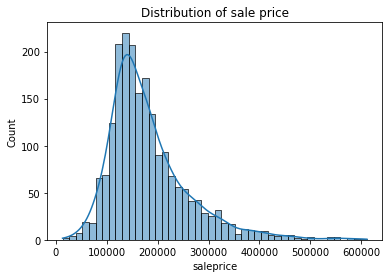

In [490]:
# sale price distribution
sns.histplot(train2['saleprice'].dropna(),kde=True)
plt.title('Distribution of sale price')

For Above ground living area mean is 1500 sqf with max value at 5642 sqf as a outliers

In [492]:
train2['grlivarea'].describe()

count    2051.000000
mean     1499.330083
std       500.447829
min       334.000000
25%      1129.000000
50%      1444.000000
75%      1728.500000
max      5642.000000
Name: grlivarea, dtype: float64

Text(0.5, 1.0, 'Distribution of house grliving area with outliers')

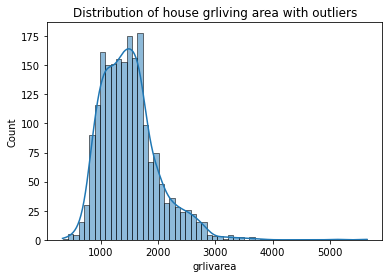

In [443]:
#Some outliers are present in the data.
sns.histplot(train2['grlivarea'].dropna(),kde=True)
plt.title('Distribution of house grliving area with outliers')

In [444]:
#cut of outlier for Above ground living area more than 4000 sqf
train2 = train2[train2['grlivarea'] < 4000]

Text(0.5, 1.0, 'Distribution of house grliving area')

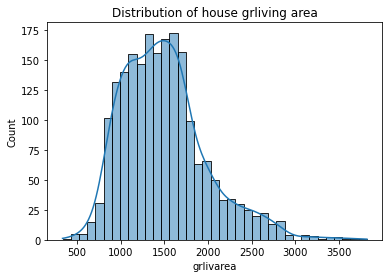

In [445]:
sns.histplot(train2['grlivarea'].dropna(),kde=True)
plt.title('Distribution of house grliving area')

House price is increase along with Above ground living area

Text(0, 0.5, 'sale price')

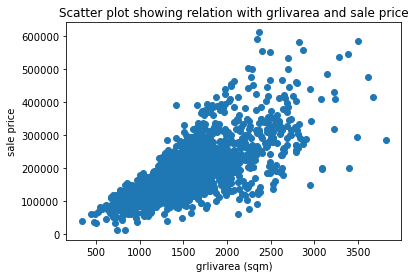

In [446]:
plt.scatter(train2['grlivarea'],train2['saleprice'] )
plt.title('Scatter plot showing relation with grlivarea and sale price')
plt.xlabel('grlivarea (sqm)')
plt.ylabel('sale price')

House age is decrease when house age get higher

In [447]:
#create house year
train2['houseage'] = train2['yrsold'] - train2['yearremod/add']
test2['houseage'] = test2['yrsold'] - test2['yearremod/add']

Text(0, 0.5, 'sale price')

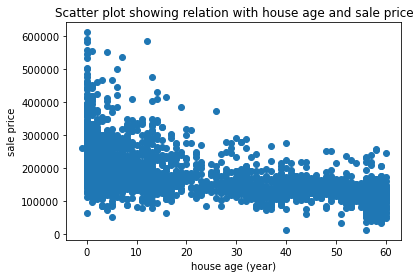

In [448]:
# Less house age can be sold at higher price

plt.scatter(train2['houseage'],train2['saleprice'] )
plt.title('Scatter plot showing relation with house age and sale price')
plt.xlabel('house age (year)')
plt.ylabel('sale price')

In [449]:
train3 = train_ori.copy()
test3 = test_ori.copy()

In [454]:
# change columns to lowercase and remove spaces
train3.columns = train3.columns.str.lower()
train3.columns = train3.columns.str.replace(' ', '')

test3.columns = test3.columns.str.lower()
test3.columns = test3.columns.str.replace(' ', '')

In [455]:
train3.head()

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


### Price per square foot as parameter to compare with features

In [456]:
train3['pricepersqf'] = train3['saleprice']/train3['grlivarea']

In [459]:
train3['pricepersqf'].describebe()

count    2051.000000
mean      121.685786
std        32.312686
min        15.371394
25%       100.526788
50%       120.413923
75%       140.458218
max       276.250881
Name: pricepersqf, dtype: float64

##### Price per square foot is nomally distributed with mean of 121

Text(0.5, 1.0, 'Distribution of Price per sqf')

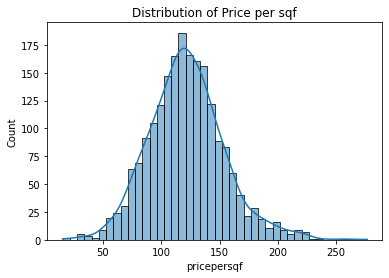

In [462]:
sns.histplot(train3['pricepersqf'].dropna(),kde=True)
plt.title('Distribution of Price per sqf')

##### Price per square foot by year sold
Price per square foot is not much change by year sold

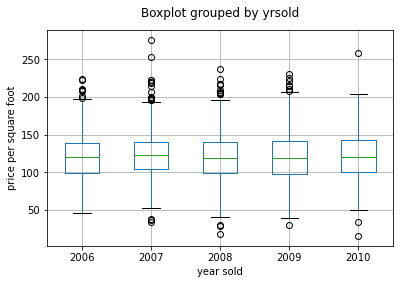

In [469]:
train3.boxplot(column=['pricepersqf'], by=['yrsold'])
plt.title('')
plt.ylabel('price per square foot')
plt.xlabel('year sold')
plt.show()

In [470]:
#create house year
train3['houseage'] = train3['yrsold'] - train3['yearremod/add']
test3['houseage'] = test3['yrsold'] - test3['yearremod/add']

##### Price per square foot by house age
Price per square foot is slighly decrease by increase of house age.

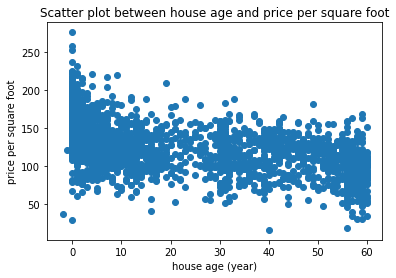

In [474]:
plt.scatter(train3['houseage'],train3['pricepersqf'])
plt.title('Scatter plot between house age and price per square foot')
plt.ylabel('price per square foot')
plt.xlabel('house age (year)')
plt.show()

##### Price per square foot by neighbouhood
Price per square foot is relatively high in area of  
    - Stone Brook  
    - Gm Hill  
    - Timberland  
    - Veenker  
    - Northridge Heights  
 
And relatively low in  
    - Iowa DOT and Rail Road  
    - Old Town  
    - Meadow Village

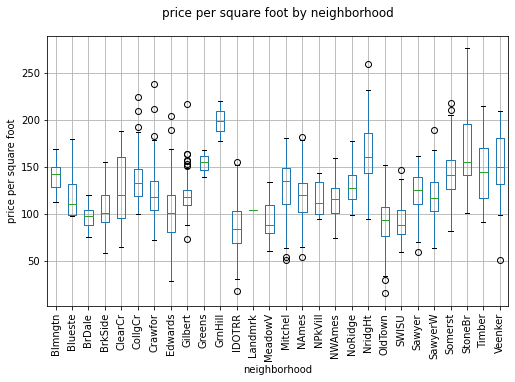

In [483]:
train3.boxplot(column=['pricepersqf'], by=['neighborhood'], figsize=(8,5))
plt.suptitle('price per square foot by neighborhood')
plt.title('')
plt.ylabel('price per square foot')
plt.xlabel('neighborhood')
plt.xticks(rotation=90)
plt.show()

Majority of the house build lately after 1975

In [493]:
train2['yearbuilt'].describe()

count    2051.000000
mean     1971.708922
std        30.177889
min      1872.000000
25%      1953.500000
50%      1974.000000
75%      2001.000000
max      2010.000000
Name: yearbuilt, dtype: float64

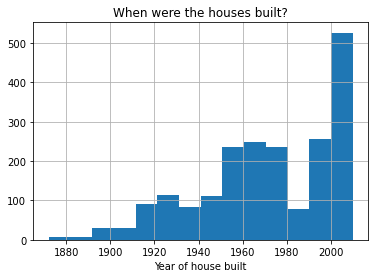

In [495]:
# majority of the house build lately after 1975

train2['yearbuilt'].hist(bins=14)
plt.title('When were the houses built?')
plt.xlabel('Year of house built')
plt.show()

In [420]:
def subplot_scatter(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=4,figsize=(15, nrows*3.5)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.regplot(y=dataframe.saleprice, x=dataframe[column],ax=ax[i],
                    line_kws = {'color':'grey'})
        ax[i].set_title(f'{column} vs saleprice',fontsize=14)  
        ax[i].tick_params(labelsize=12)
        ax[i].set_xlabel(column, fontsize=14)
        ax[i].set_ylabel('saleprice', fontsize=14)
    plt.tight_layout()

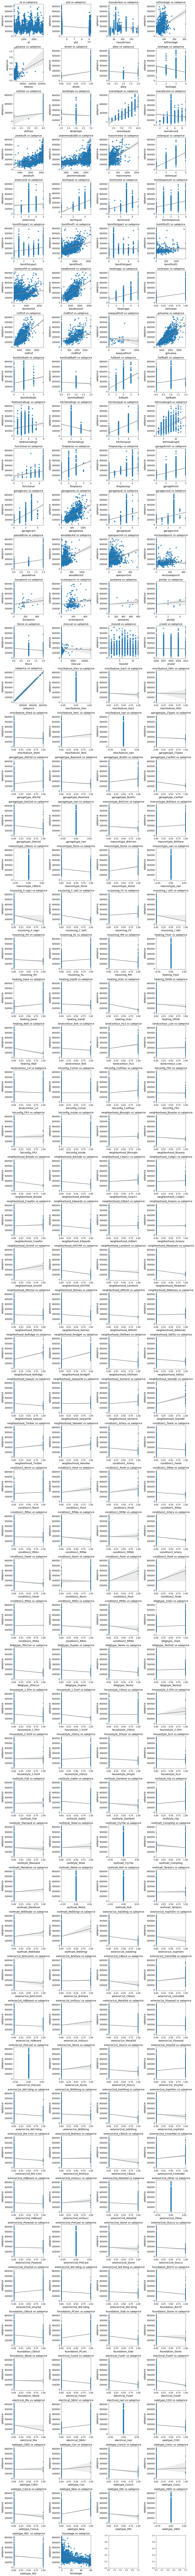

In [421]:
col_numerical = [col for col in train2.columns if train2[col].dtype != np.object]
subplot_scatter(train2,col_numerical)

In [309]:
train2.to_csv('../datasets/train_clean2.csv', index = False)
test2.to_csv('../datasets/test_clean2.csv', index = False)